In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Step 1: LOADING AND EXPLORING THE DATA

In [2]:
df=pd.read_excel("Kickstarter.xlsx")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head(5)

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,category,spotlight,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,main_category,staff_pick.1,show_feature_image,video
0,22292,Golgotha - A Feature Film,5500,5530.0,successful,False,US,USD,2017-07-09 04:59:00,2017-07-09 04:59:01,2011-02-01 23:25:17,2017-06-03 16:05:54,False,30,1.0,5530.0,Thrillers,True,4,3,22,20,Sunday,Sunday,Tuesday,Saturday,7,9,2017,4,7,9,2017,4,2,1,2011,23,6,3,2017,16,Film & Video,False,False,True
1,82234,Vinca is opening a storefront!,10000,11045.0,successful,False,US,USD,2018-10-25 14:29:30,2018-10-25 14:29:32,2012-02-28 21:10:07,2018-09-25 14:29:30,False,132,1.0,11045.0,Jewelry,True,5,4,25,23,Thursday,Thursday,Tuesday,Tuesday,10,25,2018,14,10,25,2018,14,2,28,2012,21,9,25,2018,14,Fashion,False,False,True
2,86478,The next Paul Jacobsen & The Madison Arm album!,8500,10556.0,successful,False,US,USD,2019-05-05 16:37:46,2019-05-05 16:37:46,2012-03-01 22:06:25,2019-04-05 16:37:46,False,152,1.0,10556.0,Country & Folk,True,8,6,16,13,Sunday,Sunday,Thursday,Friday,5,5,2019,16,5,5,2019,16,3,1,2012,22,4,5,2019,16,Music,False,False,True
3,127446,Erin Heist First Full-Length Album,5000,5816.0,successful,False,US,USD,2021-11-25 21:00:14,2021-11-25 21:00:14,2012-04-03 22:44:17,2021-10-26 20:00:14,False,86,1.0,5816.0,Country & Folk,True,5,5,15,14,Thursday,Thursday,Tuesday,Tuesday,11,25,2021,21,11,25,2021,21,4,3,2012,22,10,26,2021,20,Music,False,False,True
4,151612,Earth Day Heritage: A Celebration in Music and...,15000,2361.0,failed,False,US,USD,2021-04-15 21:22:00,2021-04-15 21:22:00,2012-04-20 21:06:46,2021-03-15 19:42:17,False,40,1.0,2361.0,Classical Music,False,10,9,19,18,Thursday,Thursday,Friday,Monday,4,15,2021,21,4,15,2021,21,4,20,2012,21,3,15,2021,19,Music,False,False,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15215 entries, 0 to 15214
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        15215 non-null  int64         
 1   name                      15215 non-null  object        
 2   goal                      15215 non-null  int64         
 3   pledged                   15215 non-null  float64       
 4   state                     15215 non-null  object        
 5   disable_communication     15215 non-null  bool          
 6   country                   15215 non-null  object        
 7   currency                  15215 non-null  object        
 8   deadline                  15215 non-null  datetime64[ns]
 9   state_changed_at          15215 non-null  datetime64[ns]
 10  created_at                15215 non-null  datetime64[ns]
 11  launched_at               15215 non-null  datetime64[ns]
 12  staff_pick        

STEP 2: DATA PRE-PROCESSING

Checking missing or duplicate values

In [4]:
df.isnull().sum()

id                            0
name                          0
goal                          0
pledged                       0
state                         0
disable_communication         0
country                       0
currency                      0
deadline                      0
state_changed_at              0
created_at                    0
launched_at                   0
staff_pick                    0
backers_count                 0
static_usd_rate               0
usd_pledged                   0
category                      0
spotlight                     0
name_len                      0
name_len_clean                0
blurb_len                     0
blurb_len_clean               0
deadline_weekday              0
state_changed_at_weekday      0
created_at_weekday            0
launched_at_weekday           0
deadline_month                0
deadline_day                  0
deadline_yr                   0
deadline_hr                   0
state_changed_at_month        0
state_ch

In [5]:
df=df.dropna()

In [6]:
df.duplicated().sum()

0

In [7]:
for col in df.columns:
    print(f"{col}: {df[col].nunique(dropna=False)}")


id: 14937
name: 14929
goal: 1261
pledged: 8289
state: 4
disable_communication: 1
country: 117
currency: 15
deadline: 14789
state_changed_at: 14793
created_at: 14937
launched_at: 14935
staff_pick: 2
backers_count: 913
static_usd_rate: 4466
usd_pledged: 11014
category: 137
spotlight: 2
name_len: 14
name_len_clean: 14
blurb_len: 32
blurb_len_clean: 29
deadline_weekday: 7
state_changed_at_weekday: 7
created_at_weekday: 7
launched_at_weekday: 7
deadline_month: 12
deadline_day: 31
deadline_yr: 8
deadline_hr: 24
state_changed_at_month: 12
state_changed_at_day: 31
state_changed_at_yr: 8
state_changed_at_hr: 24
created_at_month: 12
created_at_day: 31
created_at_yr: 12
created_at_hr: 24
launched_at_month: 12
launched_at_day: 31
launched_at_yr: 8
launched_at_hr: 24
main_category: 15
staff_pick.1: 2
show_feature_image: 2
video: 2


In [8]:
df.drop(['disable_communication'], axis=1, inplace=True)

In [9]:
#Checking if staff_pick and staff_pick.1 columns are different.

if df['staff_pick'].equals(df['staff_pick.1']):
    print("The columns are exactly the same.")
else:
    print("The columns are different.")


The columns are different.


Creating "goal_USD" column to be consistent accross dataset dataset by using USD.

In [10]:
df['goal_usd'] = df['goal'] * df['static_usd_rate']

print(df[['goal', 'static_usd_rate', 'goal_usd']].head())

    goal  static_usd_rate  goal_usd
0   5500              1.0    5500.0
1  10000              1.0   10000.0
2   8500              1.0    8500.0
3   5000              1.0    5000.0
4  15000              1.0   15000.0


Dropping predictors that are not available at the time of project launch.

In [11]:
df.drop(['pledged', 'state_changed_at', 'backers_count', 'usd_pledged', 'state_changed_at_weekday', 'state_changed_at_hr', 'state_changed_at_yr', 'state_changed_at_month', 'state_changed_at_day', 'staff_pick', 'staff_pick.1'], axis=1, inplace=True)

Dropping redundant or unnecessary columns (conversion rate, pledged and goal amount in original currency (since we have USD columns for both), blurb and name length to avoid multicoolinearity with the name_len_clean	and blurb_len_clean).

In [12]:
df.drop(['goal', 'static_usd_rate', 'blurb_len', 'name_len'], axis=1, inplace=True)

Creating new predictors to check it would contribute to the model later in the feature selection step.

1. Campaign duration - Calculate the time (in days) from project launch to deadline
2. Time Between Creation and Launch - Calculate the time (in days) from project creation to launch

In [13]:
df['campaign_duration'] = (df['deadline'] - df['launched_at']).dt.days
df['time_to_launch'] = (df['launched_at'] - df['created_at']).dt.days

Feature engineering - Creating weekday/weekend predictors to see if these would better contribute to the model later in the feature selection step

In [14]:
# Defining a function to classify days as weekend or weekday
def classify_weekend_or_weekday(day_name):
    return 'Weekend' if day_name in ['Saturday', 'Sunday'] else 'Weekday'

# Applying the function to the relevant columns
df['deadline_type'] = df['deadline_weekday'].apply(classify_weekend_or_weekday)
df['created_at_type'] = df['created_at_weekday'].apply(classify_weekend_or_weekday)
df['launched_at_type'] = df['launched_at_weekday'].apply(classify_weekend_or_weekday)

# Previewing the resulting columns
print(df[['deadline_weekday', 'deadline_type',
          'created_at_weekday', 'created_at_type',
          'launched_at_weekday', 'launched_at_type']].head())


  deadline_weekday deadline_type created_at_weekday created_at_type  \
0           Sunday       Weekend            Tuesday         Weekday   
1         Thursday       Weekday            Tuesday         Weekday   
2           Sunday       Weekend           Thursday         Weekday   
3         Thursday       Weekday            Tuesday         Weekday   
4         Thursday       Weekday             Friday         Weekday   

  launched_at_weekday launched_at_type  
0            Saturday          Weekend  
1             Tuesday          Weekday  
2              Friday          Weekday  
3             Tuesday          Weekday  
4              Monday          Weekday  


Creating time of the day predictors to reduce dimentionality.

In [15]:
# Function to classify time of day
def classify_time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

# Apply the classification to each time-related column
df['deadline_time_of_day'] = df['deadline_hr'].apply(classify_time_of_day)
df['launched_at_time_of_day'] = df['launched_at_hr'].apply(classify_time_of_day)
df['created_at_time_of_day'] = df['created_at_hr'].apply(classify_time_of_day)

# Optional: Preview the results
print(df[['deadline_hr', 'deadline_time_of_day', 'launched_at_hr', 'launched_at_time_of_day', 'created_at_hr', 'created_at_time_of_day']].head())


   deadline_hr deadline_time_of_day  launched_at_hr launched_at_time_of_day  \
0            4                night              16               afternoon   
1           14            afternoon              14               afternoon   
2           16            afternoon              16               afternoon   
3           21              evening              20                 evening   
4           21              evening              19                 evening   

   created_at_hr created_at_time_of_day  
0             23                evening  
1             21                evening  
2             22                evening  
3             22                evening  
4             21                evening  


Dropping date formatted columns as the dataset already has seperate columns on launched/created/changed Year, Month, Day.

In [16]:
df.drop(['deadline','created_at','launched_at'], axis=1, inplace=True)

Dropping weekday and hour data as Weekday/Weekend, afternoon/evening/night column has been created

In [17]:
df.drop(['deadline_weekday','created_at_weekday','launched_at_weekday', 'created_at_hr', 
         'created_at_day', 'launched_at_day', 'deadline_hr', 'deadline_day', 'launched_at_hr'], axis=1, inplace=True)

An attempt to treat the month and year columns as categorical columns and dummify them has been attempted, however, the best accuracy results were 0.7855 for logistic regression, 0.7859 and 0.7875 respectively for ridge and lasso regression, which were lower than the accuracy of keeping these columns as numericals, so these columns were kept as numbers in the final model. 

In [18]:
# columns_to_dummify = [
#     'created_at_yr', 'created_at_month',
#     'launched_at_month', 'launched_at_yr',
#     'deadline_month', 'deadline_yr'
# ]

# df = pd.get_dummies(df, columns=columns_to_dummify, drop_first=False) 


In [19]:
df['state'].value_counts()

state
successful    8087
failed        6098
canceled       726
live            26
Name: count, dtype: int64

In [20]:
df = df[df['state'].isin(['successful', 'failed'])]

Quickly checking the outliers across successful and failed projects for latter use in the outlier detection section.

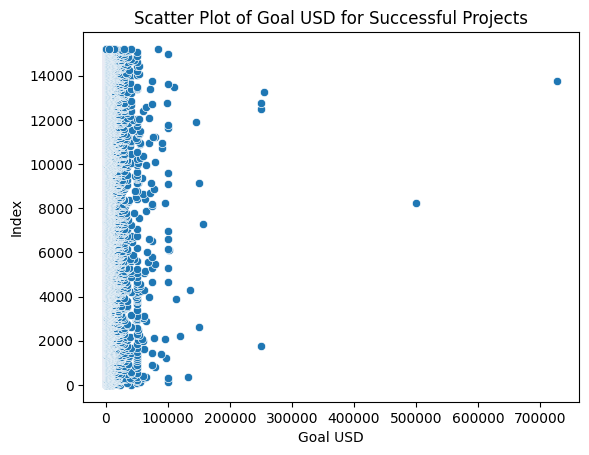

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only successful projects
df_successful = df[df['state'] == 'successful']

# Create the scatter plot
sns.scatterplot(data=df_successful, x='goal_usd', y=df_successful.index)
plt.title("Scatter Plot of Goal USD for Successful Projects")
plt.xlabel("Goal USD")
plt.ylabel("Index")
plt.show()


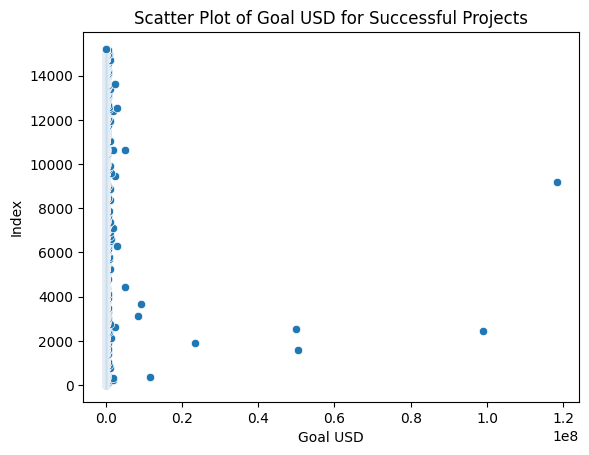

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only successful projects
df_failed = df[df['state'] == 'failed']

# Create the scatter plot
sns.scatterplot(data=df_failed, x='goal_usd', y=df_failed.index)
plt.title("Scatter Plot of Goal USD for Successful Projects")
plt.xlabel("Goal USD")
plt.ylabel("Index")
plt.show()


Making boolean columns as numeric inputs

In [23]:
boolean_columns = ['spotlight', 
                 'show_feature_image', 'video']
df[boolean_columns] = df[boolean_columns].astype(int)

Converting target variable "state" into integer-encoded label.

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['state'] = encoder.fit_transform(df['state'])  # Converts 'successful', 'failed' to 1, 0


In [25]:
df['country'].value_counts()

country
US    8289
GB    1749
CA     687
MX     448
DE     345
AU     329
FR     311
IT     279
ES     268
HK     156
NL     134
SE     127
JP     126
SG      92
DK      69
CH      68
BE      61
NZ      59
IE      54
AT      50
PL      38
NO      34
UA      32
GR      25
CN      23
KR      18
CO      16
IN      14
PR      12
TH      11
VN      11
IL      10
HR       9
RU       8
LU       8
ID       7
TW       7
HU       7
PE       7
CR       7
SI       6
KE       6
PT       6
NG       6
EC       5
GH       5
CZ       5
ZA       5
PH       5
CU       5
AR       5
IS       4
RS       4
BR       4
JM       4
CY       3
FI       3
ET       3
UG       3
MA       3
AE       3
EE       3
LT       3
TR       3
BA       3
BS       3
VE       3
NP       3
IQ       3
BT       2
AM       2
PK       2
RO       2
BO       2
MT       2
LB       2
SL       2
HN       2
AF       2
MN       2
SN       2
SV       2
BG       2
NI       2
SJ       2
MY       2
TZ       2
GU       1
TV       1
KG       1
PA

Since many countries have a very small frequency, grouping those countries into 'Other' to simplify the model.

In [26]:
# Define a threshold for grouping rare countries
threshold = 10

# Identify countries with counts greater than the threshold
countries_above_threshold = df['country'].value_counts()[df['country'].value_counts() > threshold].index.tolist()

# Map countries to themselves if they are above the threshold, otherwise map to 'Other'
df['country'] = df['country'].apply(lambda x: x if x in countries_above_threshold else 'Other')

# Create dummies for the updated 'country' column
country_dummies = pd.get_dummies(df['country'], prefix='country')

# Add the dummies back to the DataFrame
df = pd.concat([df, country_dummies], axis=1)

Dropping columns that will not serve as predictors, and dropping country column because dummies has been created in above cell.

In [27]:
df.drop(['name', 'id', 'country'], axis=1, inplace=True)

In [28]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)

['currency', 'category', 'main_category', 'deadline_type', 'created_at_type', 'launched_at_type', 'deadline_time_of_day', 'launched_at_time_of_day', 'created_at_time_of_day']


Removing target variable 'state' from df before dummifying.

In [29]:
categorical_columns = [col for col in categorical_columns if col not in ['state']]
print(categorical_columns)

['currency', 'category', 'main_category', 'deadline_type', 'created_at_type', 'launched_at_type', 'deadline_time_of_day', 'launched_at_time_of_day', 'created_at_time_of_day']


Dummifying categorical columns

In [30]:
df=pd.get_dummies(df, columns=categorical_columns)

Removing anomalies using Isolation Forest

In [31]:
numerical_columns = ['name_len_clean', 'blurb_len_clean','goal_usd', 'campaign_duration', 'time_to_launch']

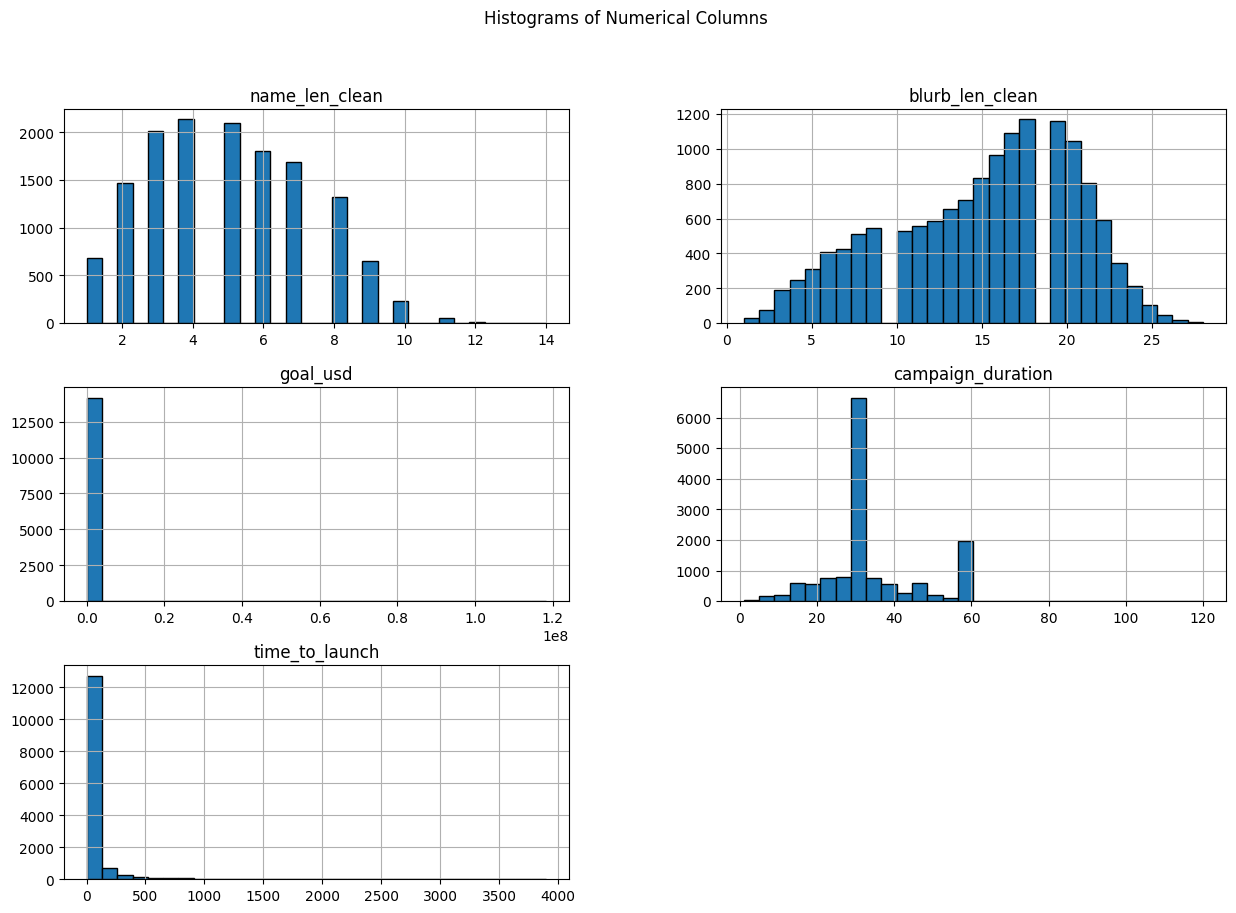

In [32]:
import matplotlib.pyplot as plt

# Plot histograms of numerical columns
df[numerical_columns].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')  # Add a title to the figure
plt.show()

To avoid data leakage, creating new dataframe called 'df_scaled' to apply Isolation Forest in detecting anomalies. After defining, anomalies will be removed from 'df' dataframe. Before applying Isolation Forest, a graphical approach has been taken to detect and remove extreme outliers.

In [33]:
df_scaled = df.copy()

# Applying log transformation to address skewness

for col in numerical_columns:
    df_scaled[f'{col}_log'] = np.log1p(df_scaled[col])

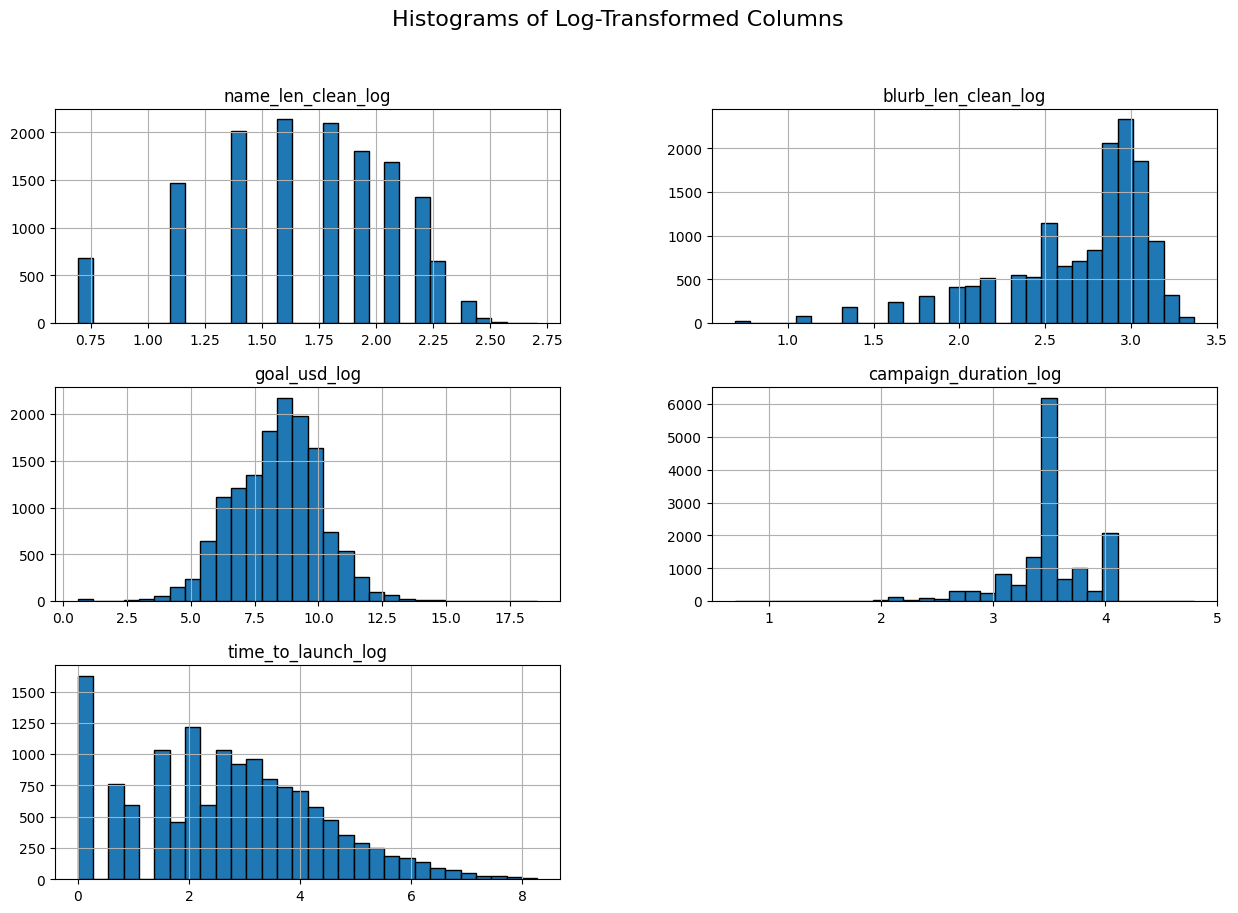

In [34]:
log_transformed_columns = [col for col in df_scaled.columns if col.endswith('_log')]

df_scaled[log_transformed_columns].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Log-Transformed Columns', fontsize=16)
plt.show()

In [35]:
# List of columns to apply IQR
iqr_columns = ['blurb_len_clean_log', 'goal_usd_log', 'campaign_duration_log', 'time_to_launch_log']

# Apply IQR filtering
for column in iqr_columns:
    Q1 = df_scaled[column].quantile(0.25)
    Q3 = df_scaled[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    # Filter out rows with outliers
    df_scaled = df_scaled[(df_scaled[column] >= lower_bound) & (df_scaled[column] <= upper_bound)]

print(f"DataFrame shape after IQR filtering: {df_scaled.shape}")


DataFrame shape after IQR filtering: (11370, 237)


In [36]:
numerical_columns_to_scale = ['name_len_clean_log', 'blurb_len_clean_log', 'goal_usd_log', 'campaign_duration_log', 'time_to_launch_log']

Scaling numerical columns under 'df_scaled' as it will ensure Isolation Forest to better detect anomalies.

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled[numerical_columns_to_scale] = scaler.fit_transform(df_scaled[numerical_columns_to_scale])
print(df_scaled.head())

   state  spotlight  name_len_clean  blurb_len_clean  deadline_month  \
0      1          1               3               20               7   
1      1          1               4               23              10   
2      1          1               6               13               5   
3      1          1               5               14              11   
4      0          0               9               18               4   

   deadline_yr  created_at_month  created_at_yr  launched_at_month  \
0         2017                 2           2011                  6   
1         2018                 2           2012                  9   
2         2019                 3           2012                  4   
3         2021                 4           2012                 10   
4         2021                 4           2012                  3   

   launched_at_yr  show_feature_image  video  goal_usd  campaign_duration  \
0            2017                   0      1    5500.0               

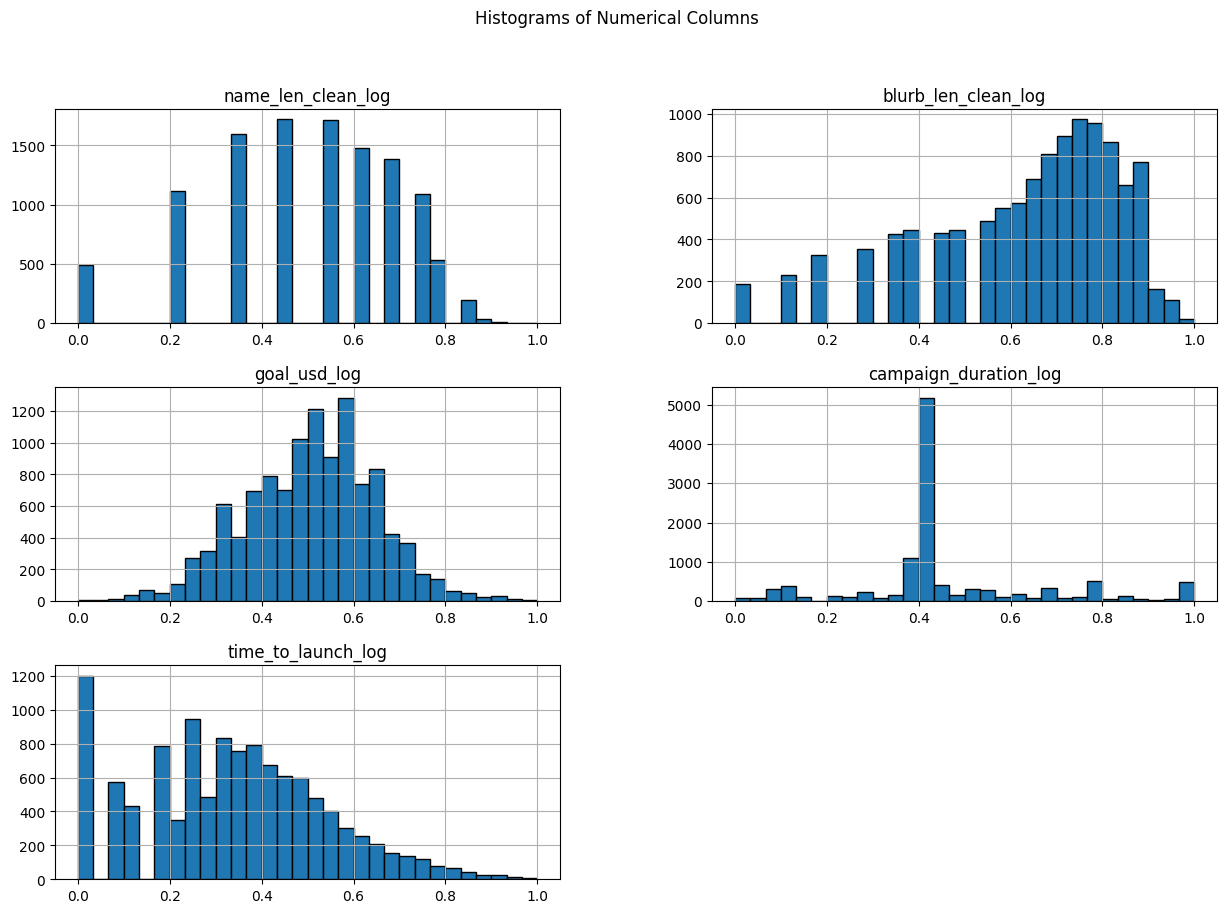

In [38]:
import matplotlib.pyplot as plt

# Plot histograms of numerical columns
df_scaled[numerical_columns_to_scale].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')  # Add a title to the figure
plt.show()

In [39]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=100, contamination=.1, random_state = 42)
pred = iforest.fit_predict(df_scaled)
score = iforest.decision_function(df_scaled)
print(list(pred))
print(score)

[1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1

In [40]:
from numpy import where
anomaly_indices = where(pred==-1)[0]
df = df.drop(index=df.index.intersection(anomaly_indices))

Preparation for Logistic Regression - checking multicollinearity

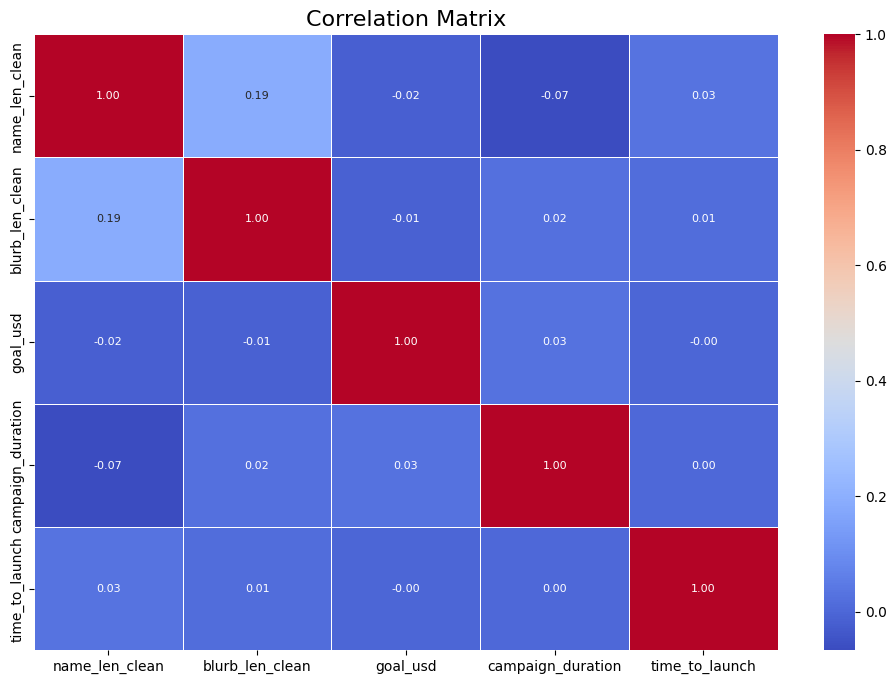


Highly Correlated Features (|correlation| > threshold):

Variance Inflation Factor (VIF):
             Feature       VIF
0     name_len_clean  4.905644
1    blurb_len_clean  6.432866
2           goal_usd  1.002350
3  campaign_duration  4.830357
4     time_to_launch  1.106458

Features with High VIF (> 5):
           Feature       VIF
1  blurb_len_clean  6.432866


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure the columns exist in the DataFrame
missing_columns = [col for col in numerical_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing from the DataFrame: {missing_columns}")

# Subset the DataFrame to only include the specified numerical columns
numerical_data = df[numerical_columns]

# Handle missing values by filling with 0 (or use another imputation strategy)
numerical_data = numerical_data.fillna(0)

# Correlation Matrix
def plot_correlation_matrix(data, threshold=0.8):
    """
    Plots the correlation matrix and highlights features with high correlation.
    """
    corr_matrix = data.corr()
    
    # Plot the heatmap with smaller annotation font size
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        corr_matrix, 
        annot=True, 
        annot_kws={"size": 8},  # Set annotation font size
        cmap='coolwarm', 
        fmt=".2f", 
        linewidths=0.5
    )
    plt.title("Correlation Matrix", fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
    
    # Print highly correlated pairs
    print("\nHighly Correlated Features (|correlation| > threshold):")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print(f"{corr_matrix.columns[i]} and {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]}")

# Variance Inflation Factor (VIF)
def calculate_vif(data):
    """
    Calculates the Variance Inflation Factor (VIF) for each feature.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# Check Correlation Matrix
plot_correlation_matrix(numerical_data)

# Calculate VIF
vif_results = calculate_vif(numerical_data)
print("\nVariance Inflation Factor (VIF):")
print(vif_results)

# Highlight features with high VIF
high_vif = vif_results[vif_results["VIF"] > 5]
if not high_vif.empty:
    print("\nFeatures with High VIF (> 5):")
    print(high_vif)
else:
    print("\nNo features with VIF > 5 detected.")


Note: Keeping blurb_len_clean in the final model as removing it did not improve the model accuracy.

In [42]:
df.head(5)

,state,spotlight,name_len_clean,blurb_len_clean,deadline_month,deadline_yr,created_at_month,created_at_yr,launched_at_month,launched_at_yr,show_feature_image,video,goal_usd,campaign_duration,time_to_launch,country_AT,country_AU,country_BE,country_CA,country_CH,country_CN,country_CO,country_DE,country_DK,country_ES,country_FR,country_GB,country_GR,country_HK,country_IE,country_IN,country_IT,country_JP,country_KR,country_MX,country_NL,country_NO,country_NZ,country_Other,country_PL,country_PR,country_SE,country_SG,country_TH,country_UA,country_US,country_VN,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_PLN,currency_SEK,currency_SGD,currency_USD,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art Books,category_Audio,category_Bacon,category_Blues,category_Calendars,category_Camera Equipment,category_Candles,category_Ceramics,category_Children's Books,category_Childrenswear,category_Chiptune,category_Civic Design,category_Classical Music,category_Comedy,category_Community Gardens,category_Conceptual Art,category_Cookbooks,category_Country & Folk,category_Couture,category_Crochet,category_DIY,category_DIY Electronics,category_Digital Art,category_Documentary,category_Drama,category_Drinks,category_Electronic Music,category_Embroidery,category_Events,category_Experimental,category_Fabrication Tools,category_Faith,category_Family,category_Fantasy,category_Farmer's Markets,category_Farms,category_Festivals,category_Fiction,category_Fine Art,category_Flight,category_Food Trucks,category_Footwear,category_Gadgets,category_Gaming Hardware,category_Glass,category_Graphic Design,category_Hardware,category_Hip-Hop,category_Horror,category_Illustration,category_Immersive,category_Indie Rock,category_Installations,category_Interactive Design,category_Jazz,category_Jewelry,category_Kids,category_Knitting,category_Latin,category_Literary Spaces,category_Live Games,category_Makerspaces,category_Metal,category_Mixed Media,category_Mobile Games,category_Movie Theaters,category_Music Videos,category_Musical,category_Narrative Film,category_Nature,category_Nonfiction,category_Painting,category_People,category_Performance Art,category_Performances,category_Periodicals,category_Pet Fashion,category_Photo,category_Photobooks,category_Places,category_Playing Cards,category_Poetry,category_Pop,category_Pottery,category_Print,category_Printing,category_Product Design,category_Public Art,category_Punk,category_Puzzles,category_Quilts,category_R&B,category_Radio & Podcasts,category_Ready-to-wear,category_Residencies,category_Restaurants,category_Robots,category_Rock,category_Science Fiction,category_Sculpture,category_Shorts,category_Small Batch,category_Social Practice,category_Software,category_Sound,category_Space Exploration,category_Spaces,category_Stationery,category_Tabletop Games,category_Television,category_Textiles,category_Thrillers,category_Toys,category_Translations,category_Typography,category_Vegan,category_Video,category_Video Games,category_Wearables,category_Weaving,category_Web,category_Webseries,category_Woodworking,category_Workshops,category_World Music,category_Young Adult,category_Zines,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,deadline_type_Weekday,deadline_type_Weekend,created_at_type_Weekday,created_at_type_Weekend,launched_at_type_Weekday,launched_at_type_Weekend,deadline_time_of_day_afternoon,deadline_time_of_day_evening,deadline_time_of_day_morning,deadline_time_of_day_night,launched_at_time_of_d

Checking if any of the predictors is perfectly correlated with the target variable.

In [43]:
X=df.drop(['state'], axis=1)
y=df['state']

# Append the target to the dataset temporarily
data_with_target = X.copy()
data_with_target['target'] = y

# Compute correlations
corr_matrix = data_with_target.corr()
target_corr = corr_matrix['target'].drop('target')  # Drop self-correlation

# Identify highly correlated predictors
high_corr = target_corr[abs(target_corr) > 0.95]  # Adjust threshold as needed
print("Predictors highly correlated with the target:\n", high_corr)


Predictors highly correlated with the target:
 spotlight    1.0
Name: target, dtype: float64


Conclusion: 'spotlight' will be dropped from the predictor when defining 'X' in model building section.

STEP 3: MODEL TUNING

LASSO-REGULARIZED LOGISTIC REGRESSION

'df_1' dataframe has been created by duplicating cleaned 'df' to build the Logistic Regression model (as the 'df' has been used to try other models before choosing the final model which are not erased from the final code). Highly skewed columns has been log-transformed to address the skewness and the dataframe has been scaled as Logistic Regression model is sensitive to input scales.

In [44]:
df_1 = df.copy()
df_1['goal_usd_log'] = np.log1p(df_1['goal_usd'])
df_1['campaign_duration_log'] = np.log1p(df_1['campaign_duration'])
df_1['time_to_launch_log'] = np.log1p(df_1['time_to_launch'])

df_1 = df_1.drop(columns=['goal_usd', 'campaign_duration', 'time_to_launch'])

In [45]:
X_1=df_1.drop(['state', 'spotlight'], axis=1)
y_1=df_1['state']

In [46]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.3, random_state = 42)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_1.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_1.columns)

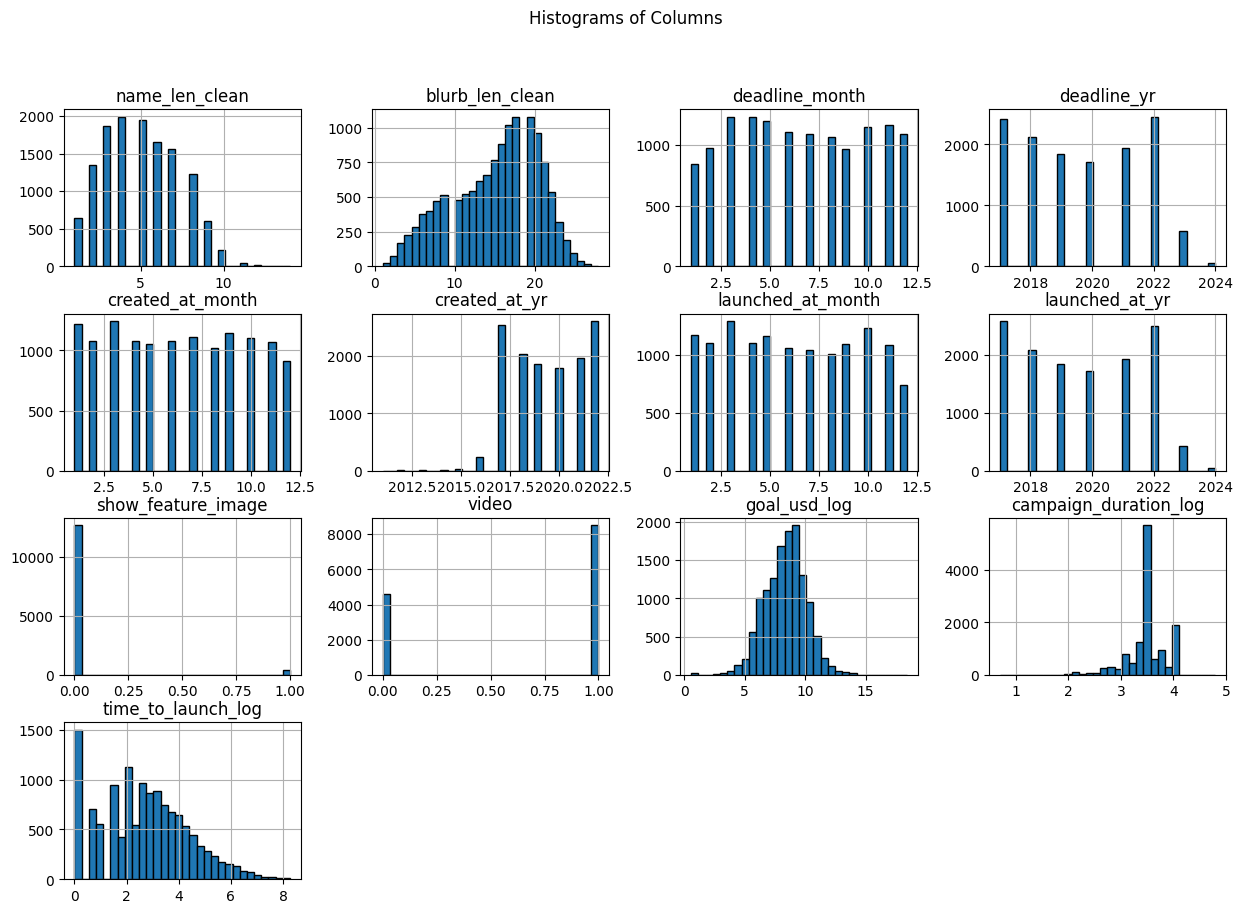

In [48]:
import matplotlib.pyplot as plt

# Plot histograms of numerical columns
X_1.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Columns')
plt.show()

LASSO REGULARIZED LOGISTIC REGRESSION

In [49]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score


# Define Lasso Logistic Regression
lr = LogisticRegression(random_state=42, penalty='l1', solver='liblinear', max_iter=1000)

# Perform cross-validation using cross_validate
cv_results = cross_validate(lr, X_train_scaled, y_train_1, cv=5, scoring='accuracy', return_train_score=True)

# Print cross-validation results
print("Cross-Validation Training Scores:", cv_results['train_score'])
print("Cross-Validation Validation Scores:", cv_results['test_score'])
print("Mean CV Accuracy:", np.mean(cv_results['test_score']))

# Fit the model on the entire training set
lr.fit(X_train_scaled, y_train_1)

# Predict on the test set
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate the model on the test set
print("\nTest Set Accuracy:", accuracy_score(y_test_1, y_pred_lr))

# Define parameter grid for hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, penalty='l1', solver='liblinear', max_iter=1000),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train_1)

# Display best hyperparameters and cross-validation accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_lr = grid_search.best_estimator_
y_test_pred = best_lr.predict(X_test_scaled)
print("\nTest Set Accuracy:", accuracy_score(y_test_1, y_test_pred))

Cross-Validation Training Scores: [0.80715841 0.81330793 0.81303579 0.80677643 0.80609607]
Cross-Validation Validation Scores: [0.79706202 0.78279804 0.7849755  0.79858465 0.80348394]
Mean CV Accuracy: 0.7933808315706108

Test Set Accuracy: 0.8008636017272035
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters: {'C': 100}
Best Cross-Validation Accuracy: 0.7944693262599343

Test Set Accuracy: 0.8016256032512065


STEP 4: FEATURE SELECTION

In [50]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=42)
model = randomforest.fit(X_train_scaled,y_train_1)

feature_importance_df_1 = pd.DataFrame(list(zip(X_train_scaled.columns,model.feature_importances_)), columns = ['predictor','feature importance'])
feature_importance_df_1 = feature_importance_df_1.sort_values(by='feature importance', ascending=False)

print(feature_importance_df_1)

                             predictor  feature importance
227                       goal_usd_log            0.098233
229                 time_to_launch_log            0.063810
228              campaign_duration_log            0.061727
1                      blurb_len_clean            0.040274
0                       name_len_clean            0.033775
6                    launched_at_month            0.030922
4                     created_at_month            0.030545
2                       deadline_month            0.029980
7                       launched_at_yr            0.023791
5                        created_at_yr            0.023350
3                          deadline_yr            0.022968
9                                video            0.018568
201                 main_category_Food            0.015625
8                   show_feature_image            0.013260
219  launched_at_time_of_day_afternoon            0.011037
187                       category_Web            0.0106

In [51]:
Top_features=feature_importance_df_1[feature_importance_df_1['feature importance']>0.01]
Top_features=Top_features['predictor'].tolist()
print(Top_features)

['goal_usd_log', 'time_to_launch_log', 'campaign_duration_log', 'blurb_len_clean', 'name_len_clean', 'launched_at_month', 'created_at_month', 'deadline_month', 'launched_at_yr', 'created_at_yr', 'deadline_yr', 'video', 'main_category_Food', 'show_feature_image', 'launched_at_time_of_day_afternoon', 'category_Web', 'category_Apparel', 'created_at_time_of_day_evening']


In [52]:
X_train_rf = X_train_scaled[Top_features]  
X_test_rf = X_test_scaled[Top_features]

In [53]:
# Use the best model from GridSearchCV
best_lr_rf = LogisticRegression(
    random_state=42, 
    penalty='l1', 
    solver='liblinear', 
    max_iter=1000, 
    C=grid_search.best_params_['C']  # Best C from GridSearchCV
)

# Train the best logistic regression model on the feature-selected dataset
best_lr_rf.fit(X_train_rf, y_train_1)

# Predict on the test set using the feature-selected dataset
y_pred_rf = best_lr_rf.predict(X_test_rf)

# Evaluate the model's performance
print("Lasso Logistic Regression (Feature-Selected) Accuracy:", accuracy_score(y_test_1, y_pred_rf))
print("\nLasso Logistic Regression (Feature-Selected) Classification Report:\n", classification_report(y_test_1, y_pred_rf))


Lasso Logistic Regression (Feature-Selected) Accuracy: 0.7340614681229363

Lasso Logistic Regression (Feature-Selected) Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.63      0.67      1664
           1       0.75      0.81      0.78      2273

    accuracy                           0.73      3937
   macro avg       0.73      0.72      0.72      3937
weighted avg       0.73      0.73      0.73      3937



STEP 5: FINAL MODEL TRAINING

Note: Since the model with select features has performed worse than the model that includes all the features, the final model will cover all the features.

In [54]:
# Refit the best model on the full feature set
final_best_lr = LogisticRegression(
    random_state=42, 
    penalty='l1', 
    solver='liblinear', 
    max_iter=1000, 
    C=grid_search.best_params_['C']  # Best C from GridSearchCV
)

# Train the model on the full feature set
final_best_lr.fit(X_train_scaled, y_train_1)

# Optionally, evaluate on the test set to confirm performance
y_test_pred_full = final_best_lr.predict(X_test_scaled)
print("\nFinal Model Test Set Accuracy (All Features):", accuracy_score(y_test_1, y_test_pred_full))


Final Model Test Set Accuracy (All Features): 0.8016256032512065


Examining coefficients for business insight.

In [55]:
# Extract and Analyze Coefficients
coefficients = best_lr.coef_[0]  # For binary classification
feature_names = X_train_1.columns  # Replace with the correct feature set
coef_table = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by the magnitude of coefficients
coef_table = coef_table.sort_values(by='Coefficient', ascending=False)

# Display the sorted table
print("Feature Coefficients (Logistic Regression):")
print(coef_table)

Feature Coefficients (Logistic Regression):
                               Feature  Coefficient
8                   show_feature_image     1.835573
75           category_Children's Books     1.660758
147             category_Playing Cards     1.581760
59                category_Accessories     1.529069
64                    category_Apparel     1.523358
137                category_Nonfiction     1.348314
67                  category_Art Books     1.300715
90                category_Documentary     1.284630
167                    category_Shorts     1.280282
84             category_Country & Folk     1.242215
7                       launched_at_yr     1.120404
164                      category_Rock     1.113092
104                   category_Fiction     1.052245
184               category_Video Games     1.029175
116              category_Illustration     0.953180
5                        created_at_yr     0.871461
118                category_Indie Rock     0.734557
135            categ

In [ ]:
# ## GRADING ##

# Import the Grading Dataset
kickstarter_grading_df = pd.read_excel("Kickstarter-Grading.xlsx")

# Handle missing values and duplicates
kickstarter_grading_df = kickstarter_grading_df.dropna()
kickstarter_grading_df = kickstarter_grading_df.drop_duplicates()

# Feature Engineering
kickstarter_grading_df['goal_usd'] = kickstarter_grading_df['goal'] * kickstarter_grading_df['static_usd_rate']
kickstarter_grading_df['campaign_duration'] = (kickstarter_grading_df['deadline'] - kickstarter_grading_df['launched_at']).dt.days
kickstarter_grading_df['time_to_launch'] = (kickstarter_grading_df['launched_at'] - kickstarter_grading_df['created_at']).dt.days

# Log transformation for skewed columns
kickstarter_grading_df['goal_usd_log'] = np.log1p(kickstarter_grading_df['goal_usd'])
kickstarter_grading_df['campaign_duration_log'] = np.log1p(kickstarter_grading_df['campaign_duration'])
kickstarter_grading_df['time_to_launch_log'] = np.log1p(kickstarter_grading_df['time_to_launch'])

kickstarter_grading_df = kickstarter_grading_df.drop(columns=['goal_usd', 'campaign_duration', 'time_to_launch'])

# Defining a function to classify days as weekend or weekday
def classify_weekend_or_weekday(day_name):
    return 'Weekend' if day_name in ['Saturday', 'Sunday'] else 'Weekday'

# Applying the function to the relevant columns
kickstarter_grading_df['deadline_type'] = kickstarter_grading_df['deadline_weekday'].apply(classify_weekend_or_weekday)
kickstarter_grading_df['created_at_type'] = kickstarter_grading_df['created_at_weekday'].apply(classify_weekend_or_weekday)
kickstarter_grading_df['launched_at_type'] = kickstarter_grading_df['launched_at_weekday'].apply(classify_weekend_or_weekday)

# Function to classify time of day
def classify_time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

# Apply the classification to each time-related column
kickstarter_grading_df['deadline_time_of_day'] = kickstarter_grading_df['deadline_hr'].apply(classify_time_of_day)
kickstarter_grading_df['launched_at_time_of_day'] = kickstarter_grading_df['launched_at_hr'].apply(classify_time_of_day)
kickstarter_grading_df['created_at_time_of_day'] = kickstarter_grading_df['created_at_hr'].apply(classify_time_of_day)

# Drop unnecessary columns based on your training data logic
columns_to_drop = [
    'goal', 'static_usd_rate', 'pledged', 'state_changed_at', 'backers_count', 'usd_pledged', 
    'state_changed_at_weekday', 'state_changed_at_hr', 'state_changed_at_yr', 'state_changed_at_month',
    'state_changed_at_day', 'staff_pick', 'staff_pick.1', 'deadline', 'launched_at',
    'created_at', 'blurb_len', 'name_len', 'created_at_hr', 'created_at_day', 'launched_at_day', 
    'deadline_hr', 'deadline_day', 'launched_at_hr', 'spotlight', 'created_at_weekday', 'launched_at_weekday', 
    'deadline_weekday', 'disable_communication'
]
kickstarter_grading_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Encoding and Dummification
# Categorical columns identified from your preprocessing logic
categorical_columns = ['deadline_type', 'created_at_type', 'launched_at_type', 
                       'deadline_time_of_day', 'launched_at_time_of_day', 'created_at_time_of_day']
kickstarter_grading_df = pd.get_dummies(kickstarter_grading_df, columns=categorical_columns, drop_first=True)

kickstarter_grading_df = kickstarter_grading_df[kickstarter_grading_df['state'].isin(['successful', 'failed'])]

# Making boolean columns as numbers

boolean_columns = ['show_feature_image', 'video']
kickstarter_grading_df[boolean_columns] = kickstarter_grading_df[boolean_columns].astype(int)

# Converting target variable "state" into integer-encoded label.

encoder = LabelEncoder()
kickstarter_grading_df['state'] = encoder.fit_transform(kickstarter_grading_df['state'])  # Converts 'successful', 'failed' to 1, 0

### Grouping countries ###############################

# Define a threshold for grouping rare countries
threshold = 10

# Identify countries with counts greater than the threshold
countries_above_threshold = kickstarter_grading_df['country'].value_counts()[kickstarter_grading_df['country'].value_counts() > threshold].index.tolist()

# Map countries to themselves if they are above the threshold, otherwise map to 'Other'
kickstarter_grading_df['country'] = kickstarter_grading_df['country'].apply(lambda x: x if x in countries_above_threshold else 'Other')

# Create dummies for the updated 'country' column
country_dummies = pd.get_dummies(kickstarter_grading_df['country'], prefix='country')

# Add the dummies back to the DataFrame
kickstarter_grading_df = pd.concat([kickstarter_grading_df, country_dummies], axis=1)

#######################################################

kickstarter_grading_df.drop(['name', 'id', 'country'], axis=1, inplace=True)

categorical_columns = kickstarter_grading_df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)

# Removing target variable 'state' from df before dummifying and dummifying remaining columns.

categorical_columns = [col for col in categorical_columns if col not in ['state']]
print(categorical_columns)

kickstarter_grading_df=pd.get_dummies(kickstarter_grading_df, columns=categorical_columns)


# Align grading dataset with training dataset columns
X_grading = kickstarter_grading_df.reindex(columns=X_train_1.columns, fill_value=0)

# Ensure the target column matches
y_grading = kickstarter_grading_df['state']

# Scale the Grading Dataset (convert back to DataFrame to preserve feature names)
X_grading_scaled = pd.DataFrame(scaler.transform(X_grading), columns=X_grading.columns)

# Evaluate the Model on Grading Dataset
y_grading_pred = best_lr.predict(X_grading_scaled)

# Calculate the Accuracy Score
grading_accuracy = accuracy_score(y_grading, y_grading_pred)
print(f"Grading Dataset Accuracy: {grading_accuracy}")